In [14]:
import pandas as pd
from autograd import numpy as np
import autograd.numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [10]:
#Import Dataset
obesity = pd.read_csv("~/Coding Files/Personal Projects/Obesity Model/ObesityDataSet_raw_and_data_synthetic.csv")
obesity_data = obesity 

In [13]:
print(obesity)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [8]:
obesity_data = pd.get_dummies(obesity_data)

In [17]:
obesity_data = obesity_data.sample(frac=1)
output_train = obesity_data.iloc[:1688,-7:]
input_train = obesity_data.iloc[:1688,:-7]
output_test = obesity_data.iloc[1688:1899,-7:]
input_test = obesity_data.iloc[1688:1899,:-7]
output_val = obesity_data.iloc[1899:,-7:]
input_val = obesity_data.iloc[1899:,:-7]
print(input_train)

            Age    Height      Weight      FCVC       NCP      CH2O       FAF  \
1828  26.000000  1.637725  111.208963  3.000000  3.000000  2.709140  0.000000   
2059  26.000000  1.629727  111.275646  3.000000  3.000000  2.495851  0.000000   
1514  25.314589  1.787802  115.127662  1.588114  3.000000  2.115967  1.541072   
684   19.314429  1.672310   49.713944  2.562409  3.488342  1.670620  2.000000   
1871  21.001969  1.736215  132.145549  3.000000  3.000000  1.657541  1.672639   
...         ...       ...         ...       ...       ...       ...       ...   
1856  26.000000  1.643355  111.600553  3.000000  3.000000  2.652616  0.000000   
1870  25.954511  1.623514  109.980145  3.000000  3.000000  2.217348  0.001015   
491   25.000000  1.660000   68.000000  2.000000  3.000000  1.000000  1.000000   
216   23.000000  1.600000   63.000000  3.000000  3.000000  2.000000  3.000000   
53    23.000000  1.630000   55.000000  3.000000  3.000000  2.000000  2.000000   

           TUE  Gender_Fema

## ADAM Optimizer

In [90]:
model = tf.keras.Sequential([
     tf.keras.layers.Dense(units=28, input_dim = 31,  activation='relu'),
    #tf.keras.layers.Dense(units=56, input_dim = 31,  activation='relu', kernel_regularizer="l1"),
    #tf.keras.layers.Dense(units=28, input_dim = 31,  activation='relu', kernel_regularizer="l1"),
    #tf.keras.layers.Dense(units=14, input_dim = 31,  activation='relu', kernel_regularizer="l1"),
    tf.keras.layers.Dense(units=7, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0075), loss='categorical_crossentropy',metrics=['acc'])
hist = model.fit(input_train, output_train, batch_size=60, epochs=1000, verbose=1, validation_data=(input_val, output_val))

Epoch 1/1000
29/29 [==============================] - 1s 7ms/step - loss: 6.0184 - acc: 0.1677 - val_loss: 2.4188 - val_acc: 0.2642
Epoch 2/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.8756 - acc: 0.2749 - val_loss: 1.6458 - val_acc: 0.3491
Epoch 3/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4675 - acc: 0.4390 - val_loss: 1.4437 - val_acc: 0.4528
Epoch 4/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2897 - acc: 0.5130 - val_loss: 1.3460 - val_acc: 0.4764
Epoch 5/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2021 - acc: 0.5515 - val_loss: 1.2385 - val_acc: 0.4953
Epoch 6/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.1252 - acc: 0.5515 - val_loss: 1.1623 - val_acc: 0.5519
Epoch 7/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.0730 - acc: 0.5906 - val_loss: 1.0673 - val_acc: 0.5283
Epoch 8/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.

29/29 [==============================] - 0s 3ms/step - loss: 0.2999 - acc: 0.8904 - val_loss: 0.4175 - val_acc: 0.8538
Epoch 124/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.3066 - acc: 0.8791 - val_loss: 0.4520 - val_acc: 0.8491
Epoch 125/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.3294 - acc: 0.8661 - val_loss: 0.4479 - val_acc: 0.8396
Epoch 126/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.2955 - acc: 0.8910 - val_loss: 0.4085 - val_acc: 0.8538
Epoch 127/1000
29/29 [==============================] - 0s 4ms/step - loss: 0.3255 - acc: 0.8756 - val_loss: 0.4197 - val_acc: 0.8349
Epoch 128/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.3110 - acc: 0.8756 - val_loss: 0.6229 - val_acc: 0.7830
Epoch 129/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.3663 - acc: 0.8596 - val_loss: 0.4020 - val_acc: 0.8443
Epoch 130/1000
29/29 [==============================] - 0s 3ms/step - loss: 0

29/29 [==============================] - 0s 2ms/step - loss: 0.2319 - acc: 0.9011 - val_loss: 0.3613 - val_acc: 0.8774
Epoch 246/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.2149 - acc: 0.9159 - val_loss: 0.3587 - val_acc: 0.8538
Epoch 247/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.2149 - acc: 0.9141 - val_loss: 0.4120 - val_acc: 0.8349
Epoch 248/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.2402 - acc: 0.8975 - val_loss: 0.3439 - val_acc: 0.8821
Epoch 249/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.2211 - acc: 0.9129 - val_loss: 0.3659 - val_acc: 0.8396
Epoch 250/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.2500 - acc: 0.9011 - val_loss: 0.3912 - val_acc: 0.8774
Epoch 251/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.2190 - acc: 0.9206 - val_loss: 0.3403 - val_acc: 0.8821
Epoch 252/1000
29/29 [==============================] - 0s 2ms/step - loss: 0

29/29 [==============================] - 0s 2ms/step - loss: 0.1686 - acc: 0.9360 - val_loss: 0.4112 - val_acc: 0.8538
Epoch 368/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1919 - acc: 0.9224 - val_loss: 0.5126 - val_acc: 0.8396
Epoch 369/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.1609 - acc: 0.9396 - val_loss: 0.4505 - val_acc: 0.8538
Epoch 370/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.1745 - acc: 0.9307 - val_loss: 0.4074 - val_acc: 0.8915
Epoch 371/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1526 - acc: 0.9408 - val_loss: 0.4772 - val_acc: 0.8632
Epoch 372/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1848 - acc: 0.9307 - val_loss: 0.3706 - val_acc: 0.8915
Epoch 373/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1753 - acc: 0.9259 - val_loss: 0.3481 - val_acc: 0.8962
Epoch 374/1000
29/29 [==============================] - 0s 2ms/step - loss: 0

29/29 [==============================] - 0s 3ms/step - loss: 0.1788 - acc: 0.9313 - val_loss: 0.3632 - val_acc: 0.8868
Epoch 490/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.1715 - acc: 0.9331 - val_loss: 0.4879 - val_acc: 0.8821
Epoch 491/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.1336 - acc: 0.9455 - val_loss: 0.3680 - val_acc: 0.8868
Epoch 492/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1400 - acc: 0.9414 - val_loss: 0.4090 - val_acc: 0.8538
Epoch 493/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1446 - acc: 0.9419 - val_loss: 0.3408 - val_acc: 0.9009
Epoch 494/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1205 - acc: 0.9532 - val_loss: 0.3583 - val_acc: 0.9057
Epoch 495/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1310 - acc: 0.9461 - val_loss: 0.4517 - val_acc: 0.8962
Epoch 496/1000
29/29 [==============================] - 0s 2ms/step - loss: 0

29/29 [==============================] - 0s 3ms/step - loss: 0.0849 - acc: 0.9722 - val_loss: 0.3469 - val_acc: 0.9151
Epoch 612/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.1094 - acc: 0.9615 - val_loss: 0.5358 - val_acc: 0.8585
Epoch 613/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.1523 - acc: 0.9461 - val_loss: 0.4450 - val_acc: 0.8726
Epoch 614/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1454 - acc: 0.9467 - val_loss: 0.5254 - val_acc: 0.8962
Epoch 615/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1251 - acc: 0.9520 - val_loss: 0.3715 - val_acc: 0.8821
Epoch 616/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1208 - acc: 0.9461 - val_loss: 0.4341 - val_acc: 0.8821
Epoch 617/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1111 - acc: 0.9556 - val_loss: 0.3838 - val_acc: 0.8915
Epoch 618/1000
29/29 [==============================] - 0s 2ms/step - loss: 0

29/29 [==============================] - 0s 3ms/step - loss: 0.0786 - acc: 0.9751 - val_loss: 0.3431 - val_acc: 0.8962
Epoch 734/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.0865 - acc: 0.9680 - val_loss: 0.2809 - val_acc: 0.9057
Epoch 735/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0825 - acc: 0.9733 - val_loss: 0.3898 - val_acc: 0.8962
Epoch 736/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0861 - acc: 0.9710 - val_loss: 0.2811 - val_acc: 0.9245
Epoch 737/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0697 - acc: 0.9769 - val_loss: 0.2856 - val_acc: 0.9104
Epoch 738/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0899 - acc: 0.9674 - val_loss: 0.2929 - val_acc: 0.9057
Epoch 739/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0669 - acc: 0.9781 - val_loss: 0.2929 - val_acc: 0.9104
Epoch 740/1000
29/29 [==============================] - 0s 2ms/step - loss: 0

29/29 [==============================] - 0s 2ms/step - loss: 0.0543 - acc: 0.9840 - val_loss: 0.2390 - val_acc: 0.9340
Epoch 856/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0684 - acc: 0.9787 - val_loss: 0.3230 - val_acc: 0.9151
Epoch 857/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0649 - acc: 0.9769 - val_loss: 0.2382 - val_acc: 0.9292
Epoch 858/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0490 - acc: 0.9864 - val_loss: 0.3698 - val_acc: 0.9151
Epoch 859/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0643 - acc: 0.9757 - val_loss: 0.2876 - val_acc: 0.9057
Epoch 860/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0582 - acc: 0.9799 - val_loss: 0.3420 - val_acc: 0.9151
Epoch 861/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0550 - acc: 0.9822 - val_loss: 0.2817 - val_acc: 0.9245
Epoch 862/1000
29/29 [==============================] - 0s 2ms/step - loss: 0

29/29 [==============================] - 0s 2ms/step - loss: 0.0370 - acc: 0.9905 - val_loss: 0.2641 - val_acc: 0.9292
Epoch 978/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0516 - acc: 0.9840 - val_loss: 0.2524 - val_acc: 0.9292
Epoch 979/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0455 - acc: 0.9864 - val_loss: 0.2609 - val_acc: 0.9292
Epoch 980/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0540 - acc: 0.9816 - val_loss: 0.2433 - val_acc: 0.9151
Epoch 981/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0623 - acc: 0.9781 - val_loss: 0.4341 - val_acc: 0.8915
Epoch 982/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.0981 - acc: 0.9615 - val_loss: 0.2796 - val_acc: 0.9245
Epoch 983/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.0495 - acc: 0.9846 - val_loss: 0.2955 - val_acc: 0.9245
Epoch 984/1000
29/29 [==============================] - 0s 2ms/step - loss: 0

In [91]:
score = model.evaluate(input_test, output_test, verbose=1)
print('Test loss:', score[0])

print('Test accuracy:', score[1])

7/7 [==============================] - 0s 1ms/step - loss: 0.3668 - acc: 0.9336
Test loss: 0.36675089597702026
Test accuracy: 0.9336493015289307


In [92]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 28)                896       
                                                                 
 dense_17 (Dense)            (None, 7)                 203       
                                                                 
Total params: 1,099
Trainable params: 1,099
Non-trainable params: 0
_________________________________________________________________


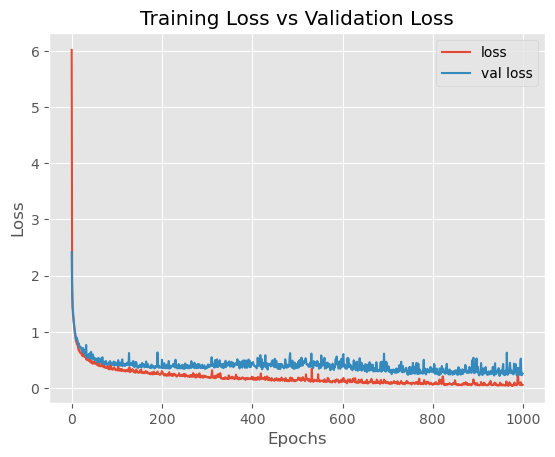

In [93]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title("Training Loss vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#Plot the graph

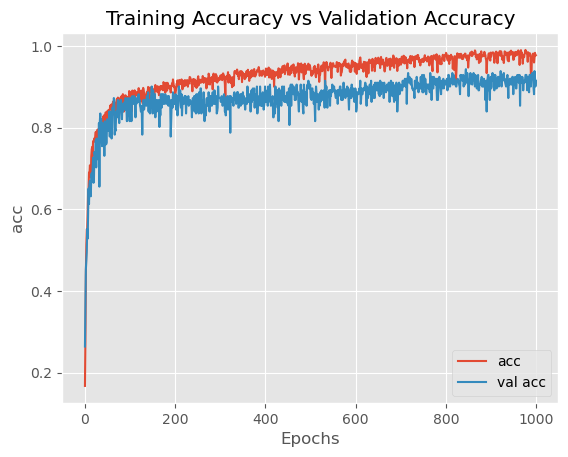

In [94]:
plt.plot(hist.history['acc'], label = 'acc')
plt.plot(hist.history['val_acc'], label='val acc')
plt.title("Training Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [23]:
obesity["NObeyesdad"].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [24]:
labels_test = output_test.values.tolist()
labels_test= np.array(labels_test)
predictions = model.predict(input_test)
confusion = tf.math.confusion_matrix(tf.argmax(labels_test,1), tf.argmax(predictions,1),num_classes=7)
print(confusion)

7/7 [==============================] - 0s 1ms/step
tf.Tensor(
[[25  0  0  0  0  0  0]
 [ 1 26  0  0  0  1  1]
 [ 0  0 34  0  0  0  0]
 [ 0  0  0 28  2  0  0]
 [ 0  0  0  0 29  0  0]
 [ 0  0  1  0  0 29  0]
 [ 0  0  2  0  0  4 28]], shape=(7, 7), dtype=int32)


In [25]:
print(output_test)

      NObeyesdad_Insufficient_Weight  NObeyesdad_Normal_Weight  \
1221                               0                         0   
187                                0                         0   
1957                               0                         0   
1942                               0                         0   
1932                               0                         0   
...                              ...                       ...   
1153                               0                         0   
48                                 0                         1   
1684                               0                         0   
380                                0                         0   
929                                0                         0   

      NObeyesdad_Obesity_Type_I  NObeyesdad_Obesity_Type_II  \
1221                          1                           0   
187                           1                           0   
1957              

## SGD Optimizer w/ Same Parameters

In [27]:
model2 = tf.keras.Sequential([
     tf.keras.layers.Dense(units=28, input_dim = 31,  activation='relu', kernel_regularizer="l1"),
    #tf.keras.layers.Dense(units=56, input_dim = 31,  activation='relu', kernel_regularizer="l1"),
    #tf.keras.layers.Dense(units=28, input_dim = 31,  activation='relu', kernel_regularizer="l1"),
    #tf.keras.layers.Dense(units=14, input_dim = 31,  activation='relu', kernel_regularizer="l1"),
    tf.keras.layers.Dense(units=7, activation='softmax', kernel_regularizer="l1")
])
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0075), loss='categorical_crossentropy',metrics=['acc'])
hist = model2.fit(input_train, output_train, batch_size=60, epochs=1000, verbose=1, validation_data=(input_val, output_val))

Epoch 1/1000
29/29 [==============================] - 1s 7ms/step - loss: 8.5253 - acc: 0.1605 - val_loss: 3.6863 - val_acc: 0.1604
Epoch 2/1000
29/29 [==============================] - 0s 2ms/step - loss: 3.6716 - acc: 0.1635 - val_loss: 3.6665 - val_acc: 0.2028
Epoch 3/1000
29/29 [==============================] - 0s 2ms/step - loss: 3.6470 - acc: 0.1748 - val_loss: 3.6397 - val_acc: 0.1509
Epoch 4/1000
29/29 [==============================] - 0s 2ms/step - loss: 3.6235 - acc: 0.1659 - val_loss: 3.6162 - val_acc: 0.1557
Epoch 5/1000
29/29 [==============================] - 0s 2ms/step - loss: 3.5990 - acc: 0.1629 - val_loss: 3.5918 - val_acc: 0.1557
Epoch 6/1000
29/29 [==============================] - 0s 2ms/step - loss: 3.5761 - acc: 0.1576 - val_loss: 3.5686 - val_acc: 0.1509
Epoch 7/1000
29/29 [==============================] - 0s 2ms/step - loss: 3.5514 - acc: 0.1605 - val_loss: 3.5433 - val_acc: 0.1462
Epoch 8/1000
29/29 [==============================] - 0s 2ms/step - loss: 3.

29/29 [==============================] - 0s 2ms/step - loss: 1.5524 - acc: 0.4236 - val_loss: 2.0482 - val_acc: 0.2406
Epoch 124/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.6288 - acc: 0.3892 - val_loss: 2.3930 - val_acc: 0.1792
Epoch 125/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.5410 - acc: 0.4325 - val_loss: 1.6877 - val_acc: 0.4387
Epoch 126/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.5863 - acc: 0.3981 - val_loss: 2.0475 - val_acc: 0.3113
Epoch 127/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.5674 - acc: 0.4206 - val_loss: 2.2198 - val_acc: 0.1887
Epoch 128/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.5243 - acc: 0.4348 - val_loss: 1.5829 - val_acc: 0.4104
Epoch 129/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.5589 - acc: 0.4100 - val_loss: 1.8742 - val_acc: 0.3255
Epoch 130/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

29/29 [==============================] - 0s 2ms/step - loss: 1.4625 - acc: 0.4621 - val_loss: 1.4006 - val_acc: 0.5472
Epoch 246/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.5023 - acc: 0.4165 - val_loss: 1.7137 - val_acc: 0.2877
Epoch 247/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4565 - acc: 0.4568 - val_loss: 1.3870 - val_acc: 0.4906
Epoch 248/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4557 - acc: 0.4591 - val_loss: 1.7750 - val_acc: 0.3443
Epoch 249/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4530 - acc: 0.4514 - val_loss: 3.0386 - val_acc: 0.1981
Epoch 250/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.5864 - acc: 0.4052 - val_loss: 1.4105 - val_acc: 0.4717
Epoch 251/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3612 - acc: 0.5059 - val_loss: 1.4406 - val_acc: 0.4151
Epoch 252/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

29/29 [==============================] - 0s 2ms/step - loss: 1.3734 - acc: 0.5077 - val_loss: 1.8284 - val_acc: 0.2264
Epoch 368/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4284 - acc: 0.4834 - val_loss: 1.4697 - val_acc: 0.4292
Epoch 369/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3583 - acc: 0.5124 - val_loss: 1.2978 - val_acc: 0.5755
Epoch 370/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4695 - acc: 0.4840 - val_loss: 1.6461 - val_acc: 0.4245
Epoch 371/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4226 - acc: 0.4722 - val_loss: 1.5032 - val_acc: 0.4057
Epoch 372/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3449 - acc: 0.5243 - val_loss: 1.3466 - val_acc: 0.5094
Epoch 373/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3548 - acc: 0.5136 - val_loss: 1.6017 - val_acc: 0.3679
Epoch 374/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

29/29 [==============================] - 0s 2ms/step - loss: 1.3527 - acc: 0.5355 - val_loss: 3.8772 - val_acc: 0.2925
Epoch 490/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4448 - acc: 0.5326 - val_loss: 1.8254 - val_acc: 0.3491
Epoch 491/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3610 - acc: 0.5332 - val_loss: 2.9056 - val_acc: 0.1887
Epoch 492/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4340 - acc: 0.4976 - val_loss: 1.3489 - val_acc: 0.4575
Epoch 493/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3377 - acc: 0.5160 - val_loss: 1.7623 - val_acc: 0.3538
Epoch 494/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3882 - acc: 0.5000 - val_loss: 1.5110 - val_acc: 0.4670
Epoch 495/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3499 - acc: 0.5154 - val_loss: 1.9877 - val_acc: 0.4104
Epoch 496/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

29/29 [==============================] - 0s 2ms/step - loss: 1.3424 - acc: 0.5735 - val_loss: 2.2956 - val_acc: 0.3302
Epoch 612/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3932 - acc: 0.5332 - val_loss: 1.4117 - val_acc: 0.5142
Epoch 613/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3807 - acc: 0.5184 - val_loss: 1.9042 - val_acc: 0.3302
Epoch 614/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3359 - acc: 0.5533 - val_loss: 2.1471 - val_acc: 0.2547
Epoch 615/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4497 - acc: 0.4870 - val_loss: 1.3756 - val_acc: 0.4764
Epoch 616/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3739 - acc: 0.5409 - val_loss: 1.2467 - val_acc: 0.6179
Epoch 617/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3635 - acc: 0.5166 - val_loss: 1.4242 - val_acc: 0.4717
Epoch 618/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

29/29 [==============================] - 0s 2ms/step - loss: 1.3634 - acc: 0.5314 - val_loss: 1.2992 - val_acc: 0.5377
Epoch 734/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4017 - acc: 0.5184 - val_loss: 1.7223 - val_acc: 0.3113
Epoch 735/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3466 - acc: 0.5415 - val_loss: 1.3577 - val_acc: 0.5000
Epoch 736/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4095 - acc: 0.4982 - val_loss: 1.3144 - val_acc: 0.5283
Epoch 737/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4530 - acc: 0.4893 - val_loss: 1.3149 - val_acc: 0.4434
Epoch 738/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4033 - acc: 0.4882 - val_loss: 1.4555 - val_acc: 0.4481
Epoch 739/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3976 - acc: 0.5267 - val_loss: 1.4358 - val_acc: 0.4151
Epoch 740/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

29/29 [==============================] - 0s 2ms/step - loss: 1.2906 - acc: 0.5788 - val_loss: 1.2559 - val_acc: 0.5849
Epoch 856/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4359 - acc: 0.5107 - val_loss: 1.2259 - val_acc: 0.6038
Epoch 857/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2619 - acc: 0.6049 - val_loss: 1.2123 - val_acc: 0.5802
Epoch 858/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2462 - acc: 0.5900 - val_loss: 1.5647 - val_acc: 0.4858
Epoch 859/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3957 - acc: 0.5083 - val_loss: 1.3390 - val_acc: 0.5094
Epoch 860/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2710 - acc: 0.5865 - val_loss: 2.0547 - val_acc: 0.3868
Epoch 861/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3818 - acc: 0.5326 - val_loss: 1.5893 - val_acc: 0.4387
Epoch 862/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

29/29 [==============================] - 0s 2ms/step - loss: 1.2077 - acc: 0.5954 - val_loss: 2.0651 - val_acc: 0.5000
Epoch 978/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3723 - acc: 0.5314 - val_loss: 1.9975 - val_acc: 0.2736
Epoch 979/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2622 - acc: 0.5948 - val_loss: 1.5456 - val_acc: 0.4104
Epoch 980/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2629 - acc: 0.5492 - val_loss: 1.5528 - val_acc: 0.4057
Epoch 981/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3550 - acc: 0.5456 - val_loss: 1.2986 - val_acc: 0.5189
Epoch 982/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2202 - acc: 0.5983 - val_loss: 1.9494 - val_acc: 0.2925
Epoch 983/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3006 - acc: 0.5521 - val_loss: 1.2164 - val_acc: 0.5708
Epoch 984/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

In [29]:
score = model2.evaluate(input_test, output_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 [==============================] - 0s 1ms/step - loss: 1.2835 - acc: 0.5024
Test loss: 1.2834616899490356
Test accuracy: 0.5023696422576904


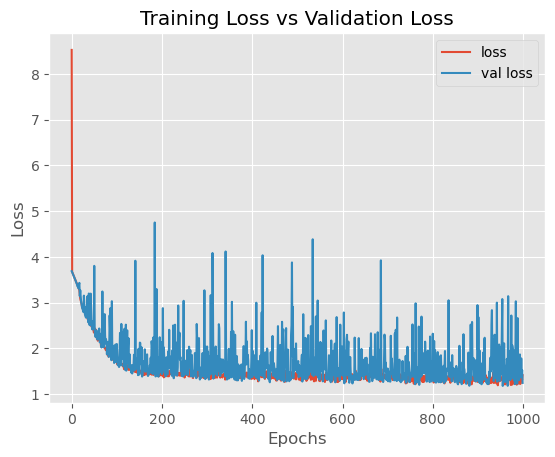

In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title("Training Loss vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

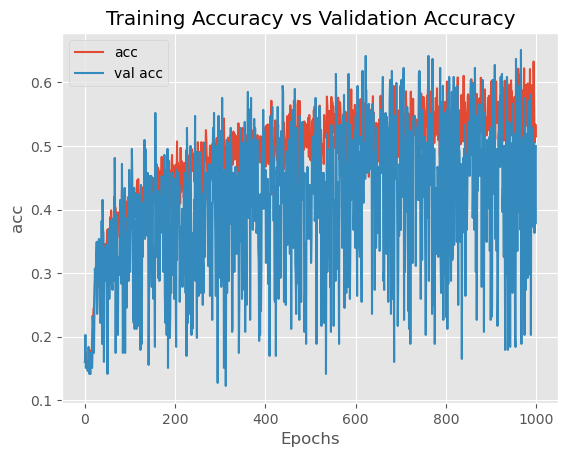

In [31]:
plt.plot(hist.history['acc'], label = 'acc')
plt.plot(hist.history['val_acc'], label='val acc')
plt.title("Training Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [32]:
predictions2 = model2.predict(input_test)
confusion = tf.math.confusion_matrix(tf.argmax(labels_test,1), tf.argmax(predictions2,1),num_classes=7)
print(confusion)

7/7 [==============================] - 0s 1ms/step
tf.Tensor(
[[25  0  0  0  0  0  0]
 [17 10  0  0  0  2  0]
 [ 0  0 18  0  5  3  8]
 [ 0  0 19  7  3  1  0]
 [ 0  0  0  0 29  0  0]
 [ 0 13  0  0  0 15  2]
 [ 0  9  9  0  0 14  2]], shape=(7, 7), dtype=int32)


## Adagrad Optimizer

In [33]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=28, input_dim = 31,  activation='relu', kernel_regularizer="l1"),
    tf.keras.layers.Dense(units=7, activation='softmax', kernel_regularizer="l1")
])
model3.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1), loss='categorical_crossentropy',metrics=['acc'])
hist = model3.fit(input_train, output_train, batch_size=32, epochs=1000, verbose=1, validation_data=(input_val, output_val))
score3 = model3.evaluate(input_test, output_test, verbose=1)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Epoch 1/1000
53/53 [==============================] - 1s 5ms/step - loss: 4.9440 - acc: 0.2547 - val_loss: 2.2857 - val_acc: 0.4481
Epoch 2/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.0617 - acc: 0.4259 - val_loss: 1.8421 - val_acc: 0.5000
Epoch 3/1000
53/53 [==============================] - 0s 2ms/step - loss: 1.7704 - acc: 0.4793 - val_loss: 1.7021 - val_acc: 0.5519
Epoch 4/1000
53/53 [==============================] - 0s 2ms/step - loss: 1.6600 - acc: 0.4994 - val_loss: 1.7150 - val_acc: 0.4340
Epoch 5/1000
53/53 [==============================] - 0s 2ms/step - loss: 1.5881 - acc: 0.5207 - val_loss: 1.5915 - val_acc: 0.4906
Epoch 6/1000
53/53 [==============================] - 0s 2ms/step - loss: 1.5341 - acc: 0.5539 - val_loss: 1.5887 - val_acc: 0.5708
Epoch 7/1000
53/53 [==============================] - 0s 2ms/step - loss: 1.4847 - acc: 0.5658 - val_loss: 1.6124 - val_acc: 0.4670
Epoch 8/1000
53/53 [==============================] - 0s 2ms/step - loss: 1.

53/53 [==============================] - 0s 2ms/step - loss: 0.9166 - acc: 0.7607 - val_loss: 0.9441 - val_acc: 0.7123
Epoch 124/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.9152 - acc: 0.7672 - val_loss: 0.9255 - val_acc: 0.7311
Epoch 125/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.9126 - acc: 0.7618 - val_loss: 0.9273 - val_acc: 0.7406
Epoch 126/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.9137 - acc: 0.7690 - val_loss: 0.9348 - val_acc: 0.7311
Epoch 127/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.9092 - acc: 0.7719 - val_loss: 0.9258 - val_acc: 0.7453
Epoch 128/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.9126 - acc: 0.7707 - val_loss: 0.9571 - val_acc: 0.7264
Epoch 129/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.9087 - acc: 0.7678 - val_loss: 0.9275 - val_acc: 0.7594
Epoch 130/1000
53/53 [==============================] - 0s 2ms/step - loss: 0

53/53 [==============================] - 0s 2ms/step - loss: 0.8382 - acc: 0.7867 - val_loss: 0.8432 - val_acc: 0.7642
Epoch 246/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.8378 - acc: 0.7832 - val_loss: 0.8491 - val_acc: 0.7642
Epoch 247/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.8377 - acc: 0.7773 - val_loss: 0.8514 - val_acc: 0.7642
Epoch 248/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.8368 - acc: 0.7873 - val_loss: 0.8538 - val_acc: 0.7594
Epoch 249/1000
53/53 [==============================] - 0s 1ms/step - loss: 0.8388 - acc: 0.7796 - val_loss: 0.8508 - val_acc: 0.7689
Epoch 250/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.8370 - acc: 0.7832 - val_loss: 0.8464 - val_acc: 0.7736
Epoch 251/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.8366 - acc: 0.7814 - val_loss: 0.8435 - val_acc: 0.7689
Epoch 252/1000
53/53 [==============================] - 0s 2ms/step - loss: 0

53/53 [==============================] - 0s 1ms/step - loss: 0.8045 - acc: 0.7915 - val_loss: 0.8126 - val_acc: 0.8066
Epoch 368/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.8060 - acc: 0.7903 - val_loss: 0.8048 - val_acc: 0.7972
Epoch 369/1000
53/53 [==============================] - 0s 1ms/step - loss: 0.8051 - acc: 0.7927 - val_loss: 0.8140 - val_acc: 0.7736
Epoch 370/1000
53/53 [==============================] - 0s 1ms/step - loss: 0.8043 - acc: 0.7885 - val_loss: 0.8115 - val_acc: 0.7877
Epoch 371/1000
53/53 [==============================] - 0s 1ms/step - loss: 0.8057 - acc: 0.7927 - val_loss: 0.8111 - val_acc: 0.7830
Epoch 372/1000
53/53 [==============================] - 0s 1ms/step - loss: 0.8028 - acc: 0.7927 - val_loss: 0.8082 - val_acc: 0.7925
Epoch 373/1000
53/53 [==============================] - 0s 1ms/step - loss: 0.8050 - acc: 0.7891 - val_loss: 0.8053 - val_acc: 0.8066
Epoch 374/1000
53/53 [==============================] - 0s 1ms/step - loss: 0

53/53 [==============================] - 0s 2ms/step - loss: 0.7875 - acc: 0.8021 - val_loss: 0.7959 - val_acc: 0.7877
Epoch 490/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7878 - acc: 0.8027 - val_loss: 0.7938 - val_acc: 0.7830
Epoch 491/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7869 - acc: 0.8069 - val_loss: 0.7894 - val_acc: 0.8113
Epoch 492/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7873 - acc: 0.8027 - val_loss: 0.7888 - val_acc: 0.8019
Epoch 493/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7870 - acc: 0.8039 - val_loss: 0.7958 - val_acc: 0.7925
Epoch 494/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7872 - acc: 0.7962 - val_loss: 0.7858 - val_acc: 0.8066
Epoch 495/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7887 - acc: 0.8027 - val_loss: 0.7869 - val_acc: 0.8160
Epoch 496/1000
53/53 [==============================] - 0s 2ms/step - loss: 0

53/53 [==============================] - 0s 2ms/step - loss: 0.7797 - acc: 0.8063 - val_loss: 0.7874 - val_acc: 0.7972
Epoch 612/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7801 - acc: 0.8075 - val_loss: 0.7870 - val_acc: 0.8019
Epoch 613/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7805 - acc: 0.8027 - val_loss: 0.7829 - val_acc: 0.8066
Epoch 614/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7797 - acc: 0.8098 - val_loss: 0.7786 - val_acc: 0.8019
Epoch 615/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7796 - acc: 0.8009 - val_loss: 0.7880 - val_acc: 0.8019
Epoch 616/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7798 - acc: 0.8051 - val_loss: 0.7848 - val_acc: 0.8160
Epoch 617/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7788 - acc: 0.8045 - val_loss: 0.7797 - val_acc: 0.8113
Epoch 618/1000
53/53 [==============================] - 0s 2ms/step - loss: 0

53/53 [==============================] - 0s 2ms/step - loss: 0.7748 - acc: 0.8051 - val_loss: 0.7885 - val_acc: 0.8019
Epoch 734/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7750 - acc: 0.8140 - val_loss: 0.7769 - val_acc: 0.8113
Epoch 735/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7747 - acc: 0.8092 - val_loss: 0.7782 - val_acc: 0.8208
Epoch 736/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7747 - acc: 0.8033 - val_loss: 0.7741 - val_acc: 0.8208
Epoch 737/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7743 - acc: 0.8045 - val_loss: 0.7830 - val_acc: 0.7972
Epoch 738/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7745 - acc: 0.8116 - val_loss: 0.7754 - val_acc: 0.8160
Epoch 739/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7745 - acc: 0.8092 - val_loss: 0.7753 - val_acc: 0.8113
Epoch 740/1000
53/53 [==============================] - 0s 1ms/step - loss: 0

53/53 [==============================] - 0s 2ms/step - loss: 0.7716 - acc: 0.8152 - val_loss: 0.7764 - val_acc: 0.8066
Epoch 856/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7699 - acc: 0.8122 - val_loss: 0.7707 - val_acc: 0.8160
Epoch 857/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7714 - acc: 0.8122 - val_loss: 0.7721 - val_acc: 0.8160
Epoch 858/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7721 - acc: 0.8158 - val_loss: 0.7725 - val_acc: 0.8113
Epoch 859/1000
53/53 [==============================] - 0s 3ms/step - loss: 0.7707 - acc: 0.8134 - val_loss: 0.7705 - val_acc: 0.8113
Epoch 860/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7705 - acc: 0.8181 - val_loss: 0.7709 - val_acc: 0.8160
Epoch 861/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7711 - acc: 0.8134 - val_loss: 0.7744 - val_acc: 0.8113
Epoch 862/1000
53/53 [==============================] - 0s 2ms/step - loss: 0

53/53 [==============================] - 0s 2ms/step - loss: 0.7672 - acc: 0.8098 - val_loss: 0.7697 - val_acc: 0.8160
Epoch 978/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7667 - acc: 0.8134 - val_loss: 0.7720 - val_acc: 0.7972
Epoch 979/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7672 - acc: 0.8110 - val_loss: 0.7744 - val_acc: 0.7972
Epoch 980/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7674 - acc: 0.8146 - val_loss: 0.7682 - val_acc: 0.8113
Epoch 981/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7681 - acc: 0.8134 - val_loss: 0.7706 - val_acc: 0.8160
Epoch 982/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7666 - acc: 0.8246 - val_loss: 0.7714 - val_acc: 0.8160
Epoch 983/1000
53/53 [==============================] - 0s 2ms/step - loss: 0.7677 - acc: 0.8211 - val_loss: 0.7666 - val_acc: 0.8160
Epoch 984/1000
53/53 [==============================] - 0s 2ms/step - loss: 0

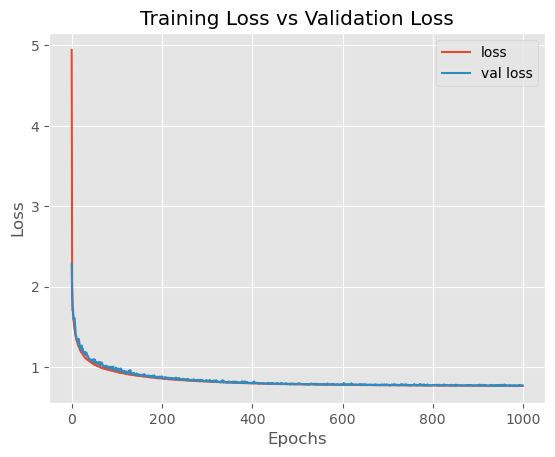

In [37]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title("Training Loss vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

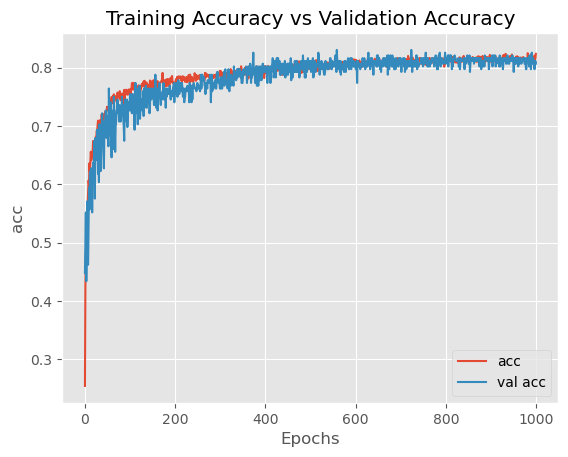

In [38]:
plt.plot(hist.history['acc'], label = 'acc')
plt.plot(hist.history['val_acc'], label='val acc')
plt.title("Training Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [39]:
predictions3 = model3.predict(input_test)
confusion = tf.math.confusion_matrix(tf.argmax(labels_test,1), tf.argmax(predictions3,1),num_classes=7)
print(confusion)

7/7 [==============================] - 0s 865us/step
tf.Tensor(
[[25  0  0  0  0  0  0]
 [ 9 16  0  0  0  4  0]
 [ 0  0 33  0  0  0  1]
 [ 0  0  1 29  0  0  0]
 [ 0  0  0  0 29  0  0]
 [ 0  6  1  0  0 19  4]
 [ 0  0  5  0  0 11 18]], shape=(7, 7), dtype=int32)


## RMSProp

In [40]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=28, input_dim = 31,  activation='relu', kernel_regularizer="l1"),
    tf.keras.layers.Dense(units=7, activation='softmax', kernel_regularizer="l1")
])
model4.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.1), loss='categorical_crossentropy',metrics=['acc'])
hist = model4.fit(input_train, output_train, batch_size=32, epochs=1000, verbose=1, validation_data=(input_val, output_val))
score = model4.evaluate(input_test, output_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/1000
53/53 [==============================] - 1s 5ms/step - loss: 8.5207 - acc: 0.1588 - val_loss: 2.8029 - val_acc: 0.1415
Epoch 2/1000
53/53 [==============================] - 0s 2ms/step - loss: 3.8073 - acc: 0.1475 - val_loss: 14.7140 - val_acc: 0.1226
Epoch 3/1000
53/53 [==============================] - 0s 2ms/step - loss: 3.8884 - acc: 0.1499 - val_loss: 2.6134 - val_acc: 0.1132
Epoch 4/1000
53/53 [==============================] - 0s 2ms/step - loss: 4.2554 - acc: 0.1410 - val_loss: 3.0024 - val_acc: 0.1415
Epoch 5/1000
53/53 [==============================] - 0s 2ms/step - loss: 3.9383 - acc: 0.1386 - val_loss: 2.6544 - val_acc: 0.1415
Epoch 6/1000
53/53 [==============================] - 0s 2ms/step - loss: 3.6840 - acc: 0.1434 - val_loss: 2.5507 - val_acc: 0.1792
Epoch 7/1000
53/53 [==============================] - 0s 2ms/step - loss: 4.4848 - acc: 0.1540 - val_loss: 13.4569 - val_acc: 0.1368
Epoch 8/1000
53/53 [==============================] - 0s 2ms/step - loss: 

53/53 [==============================] - 0s 2ms/step - loss: 2.4673 - acc: 0.1582 - val_loss: 2.4671 - val_acc: 0.1368
Epoch 124/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4642 - acc: 0.1528 - val_loss: 2.4684 - val_acc: 0.1368
Epoch 125/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4666 - acc: 0.1380 - val_loss: 2.4603 - val_acc: 0.1792
Epoch 126/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4652 - acc: 0.1517 - val_loss: 2.4613 - val_acc: 0.1792
Epoch 127/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4674 - acc: 0.1363 - val_loss: 2.4616 - val_acc: 0.1792
Epoch 128/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4646 - acc: 0.1511 - val_loss: 2.4683 - val_acc: 0.1415
Epoch 129/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4677 - acc: 0.1582 - val_loss: 2.4710 - val_acc: 0.1368
Epoch 130/1000
53/53 [==============================] - 0s 2ms/step - loss: 2

53/53 [==============================] - 0s 2ms/step - loss: 2.4663 - acc: 0.1481 - val_loss: 2.4637 - val_acc: 0.1792
Epoch 246/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4646 - acc: 0.1534 - val_loss: 2.4583 - val_acc: 0.1792
Epoch 247/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4659 - acc: 0.1445 - val_loss: 2.4813 - val_acc: 0.1226
Epoch 248/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4660 - acc: 0.1517 - val_loss: 2.4478 - val_acc: 0.1415
Epoch 249/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4641 - acc: 0.1558 - val_loss: 2.4841 - val_acc: 0.1226
Epoch 250/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4705 - acc: 0.1398 - val_loss: 2.4715 - val_acc: 0.1368
Epoch 251/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4661 - acc: 0.1528 - val_loss: 2.4662 - val_acc: 0.1792
Epoch 252/1000
53/53 [==============================] - 0s 2ms/step - loss: 2

53/53 [==============================] - 0s 2ms/step - loss: 2.4640 - acc: 0.1528 - val_loss: 2.4581 - val_acc: 0.1368
Epoch 368/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4684 - acc: 0.1605 - val_loss: 2.4576 - val_acc: 0.1368
Epoch 369/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4672 - acc: 0.1463 - val_loss: 2.4737 - val_acc: 0.1226
Epoch 370/1000
53/53 [==============================] - 0s 1ms/step - loss: 2.4659 - acc: 0.1540 - val_loss: 2.4531 - val_acc: 0.1792
Epoch 371/1000
53/53 [==============================] - 0s 1ms/step - loss: 2.4654 - acc: 0.1493 - val_loss: 2.4673 - val_acc: 0.1651
Epoch 372/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4685 - acc: 0.1534 - val_loss: 2.4581 - val_acc: 0.1132
Epoch 373/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4662 - acc: 0.1517 - val_loss: 2.4735 - val_acc: 0.1368
Epoch 374/1000
53/53 [==============================] - 0s 2ms/step - loss: 2

53/53 [==============================] - 0s 2ms/step - loss: 2.4662 - acc: 0.1511 - val_loss: 2.4705 - val_acc: 0.1226
Epoch 490/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4687 - acc: 0.1363 - val_loss: 2.4526 - val_acc: 0.1792
Epoch 491/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4663 - acc: 0.1475 - val_loss: 2.4608 - val_acc: 0.1792
Epoch 492/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4649 - acc: 0.1475 - val_loss: 2.4789 - val_acc: 0.1415
Epoch 493/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4636 - acc: 0.1671 - val_loss: 2.4728 - val_acc: 0.1132
Epoch 494/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4648 - acc: 0.1511 - val_loss: 2.4691 - val_acc: 0.1415
Epoch 495/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4695 - acc: 0.1368 - val_loss: 2.4603 - val_acc: 0.1792
Epoch 496/1000
53/53 [==============================] - 0s 2ms/step - loss: 2

53/53 [==============================] - 0s 2ms/step - loss: 2.4673 - acc: 0.1428 - val_loss: 2.4717 - val_acc: 0.1368
Epoch 612/1000
53/53 [==============================] - 0s 1ms/step - loss: 2.4642 - acc: 0.1552 - val_loss: 2.4533 - val_acc: 0.1415
Epoch 613/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4672 - acc: 0.1469 - val_loss: 2.4675 - val_acc: 0.1792
Epoch 614/1000
53/53 [==============================] - 0s 1ms/step - loss: 2.4604 - acc: 0.1783 - val_loss: 2.4729 - val_acc: 0.1651
Epoch 615/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4666 - acc: 0.1386 - val_loss: 2.4721 - val_acc: 0.1368
Epoch 616/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4665 - acc: 0.1481 - val_loss: 2.4623 - val_acc: 0.1792
Epoch 617/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4657 - acc: 0.1570 - val_loss: 2.4655 - val_acc: 0.1368
Epoch 618/1000
53/53 [==============================] - 0s 1ms/step - loss: 2

53/53 [==============================] - 0s 2ms/step - loss: 2.4634 - acc: 0.1576 - val_loss: 2.4693 - val_acc: 0.1415
Epoch 734/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4680 - acc: 0.1440 - val_loss: 2.4587 - val_acc: 0.1792
Epoch 735/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4654 - acc: 0.1540 - val_loss: 2.4691 - val_acc: 0.1792
Epoch 736/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4652 - acc: 0.1582 - val_loss: 2.4586 - val_acc: 0.1651
Epoch 737/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4661 - acc: 0.1374 - val_loss: 2.4539 - val_acc: 0.1792
Epoch 738/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4642 - acc: 0.1635 - val_loss: 2.4744 - val_acc: 0.1368
Epoch 739/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4639 - acc: 0.1659 - val_loss: 2.5009 - val_acc: 0.1226
Epoch 740/1000
53/53 [==============================] - 0s 2ms/step - loss: 2

53/53 [==============================] - 0s 2ms/step - loss: 2.4651 - acc: 0.1582 - val_loss: 2.4731 - val_acc: 0.1368
Epoch 856/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4645 - acc: 0.1517 - val_loss: 2.4514 - val_acc: 0.1792
Epoch 857/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4668 - acc: 0.1546 - val_loss: 2.4673 - val_acc: 0.1226
Epoch 858/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4683 - acc: 0.1398 - val_loss: 2.4534 - val_acc: 0.1792
Epoch 859/1000
53/53 [==============================] - 0s 1ms/step - loss: 2.4684 - acc: 0.1345 - val_loss: 2.4538 - val_acc: 0.1792
Epoch 860/1000
53/53 [==============================] - 0s 1ms/step - loss: 2.4680 - acc: 0.1481 - val_loss: 2.4698 - val_acc: 0.1368
Epoch 861/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4628 - acc: 0.1629 - val_loss: 2.4824 - val_acc: 0.1368
Epoch 862/1000
53/53 [==============================] - 0s 2ms/step - loss: 2

53/53 [==============================] - 0s 2ms/step - loss: 2.4654 - acc: 0.1457 - val_loss: 2.4705 - val_acc: 0.1368
Epoch 978/1000
53/53 [==============================] - 0s 3ms/step - loss: 2.4667 - acc: 0.1469 - val_loss: 2.4692 - val_acc: 0.1226
Epoch 979/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4630 - acc: 0.1493 - val_loss: 2.4713 - val_acc: 0.1368
Epoch 980/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4689 - acc: 0.1422 - val_loss: 2.4604 - val_acc: 0.1226
Epoch 981/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4637 - acc: 0.1611 - val_loss: 2.4722 - val_acc: 0.1226
Epoch 982/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4659 - acc: 0.1570 - val_loss: 2.4742 - val_acc: 0.1226
Epoch 983/1000
53/53 [==============================] - 0s 2ms/step - loss: 2.4677 - acc: 0.1576 - val_loss: 2.4579 - val_acc: 0.1792
Epoch 984/1000
53/53 [==============================] - 0s 2ms/step - loss: 2

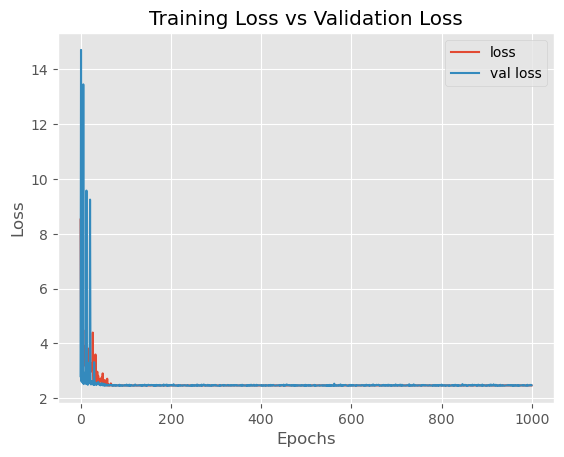

In [41]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title("Training Loss vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

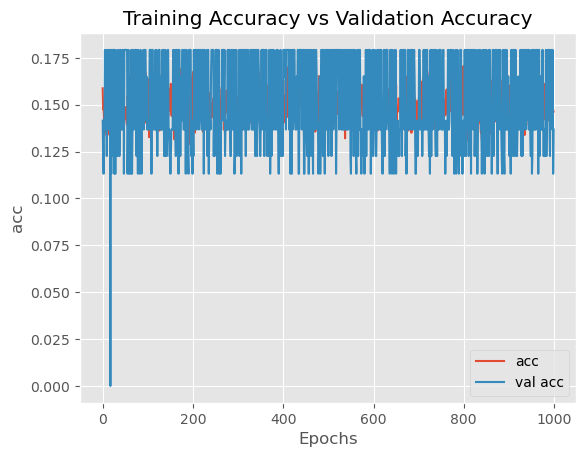

In [42]:
plt.plot(hist.history['acc'], label = 'acc')
plt.plot(hist.history['val_acc'], label='val acc')
plt.title("Training Accuracy vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [43]:
predictions4 = model4.predict(input_test)
confusion = tf.math.confusion_matrix(tf.argmax(labels_test,1), tf.argmax(predictions4,1),num_classes=7)
print(confusion)

7/7 [==============================] - 0s 1ms/step
tf.Tensor(
[[ 0  0  0  0 25  0  0]
 [ 0  0  0  0 29  0  0]
 [ 0  0  0  0 34  0  0]
 [ 0  0  0  0 30  0  0]
 [ 0  0  0  0 29  0  0]
 [ 0  0  0  0 30  0  0]
 [ 0  0  0  0 34  0  0]], shape=(7, 7), dtype=int32)


## SGD w/ Multiple Hidden Layers

In [44]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=56, input_dim = 31,  activation='relu', kernel_regularizer="l1"),
    tf.keras.layers.Dense(units=28, input_dim = 31,  activation='relu', kernel_regularizer="l1"),
    tf.keras.layers.Dense(units=14, input_dim = 31,  activation='relu', kernel_regularizer="l1"),
    tf.keras.layers.Dense(units=7, activation='softmax', kernel_regularizer="l1")
])
model5.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0075), loss='categorical_crossentropy',metrics=['acc'])
hist = model5.fit(input_train, output_train, batch_size=60, epochs=1000, verbose=1, validation_data=(input_val, output_val))
score = model5.evaluate(input_test, output_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/1000
29/29 [==============================] - 1s 8ms/step - loss: 7.6015 - acc: 0.1914 - val_loss: 7.0234 - val_acc: 0.1981
Epoch 2/1000
29/29 [==============================] - 0s 2ms/step - loss: 6.9130 - acc: 0.2186 - val_loss: 6.8479 - val_acc: 0.2972
Epoch 3/1000
29/29 [==============================] - 0s 2ms/step - loss: 6.7926 - acc: 0.2328 - val_loss: 6.8340 - val_acc: 0.2028
Epoch 4/1000
29/29 [==============================] - 0s 2ms/step - loss: 6.7104 - acc: 0.2429 - val_loss: 6.6874 - val_acc: 0.2358
Epoch 5/1000
29/29 [==============================] - 0s 3ms/step - loss: 6.6040 - acc: 0.2506 - val_loss: 6.6451 - val_acc: 0.2594
Epoch 6/1000
29/29 [==============================] - 0s 2ms/step - loss: 6.5243 - acc: 0.2719 - val_loss: 6.5689 - val_acc: 0.3019
Epoch 7/1000
29/29 [==============================] - 0s 2ms/step - loss: 6.4067 - acc: 0.2850 - val_loss: 6.4141 - val_acc: 0.3019
Epoch 8/1000
29/29 [==============================] - 0s 2ms/step - loss: 6.

29/29 [==============================] - 0s 3ms/step - loss: 1.7972 - acc: 0.4206 - val_loss: 1.8222 - val_acc: 0.3962
Epoch 124/1000
29/29 [==============================] - 0s 3ms/step - loss: 1.7711 - acc: 0.4200 - val_loss: 2.0009 - val_acc: 0.2783
Epoch 125/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.7559 - acc: 0.4331 - val_loss: 1.7159 - val_acc: 0.4481
Epoch 126/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.7658 - acc: 0.4105 - val_loss: 1.7021 - val_acc: 0.4811
Epoch 127/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.7441 - acc: 0.4336 - val_loss: 1.8276 - val_acc: 0.3349
Epoch 128/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.8455 - acc: 0.3957 - val_loss: 2.0278 - val_acc: 0.2358
Epoch 129/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.7554 - acc: 0.4455 - val_loss: 2.0120 - val_acc: 0.2783
Epoch 130/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

29/29 [==============================] - 0s 3ms/step - loss: 1.4814 - acc: 0.4633 - val_loss: 1.6951 - val_acc: 0.3491
Epoch 246/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4872 - acc: 0.4775 - val_loss: 1.4295 - val_acc: 0.4906
Epoch 247/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.5322 - acc: 0.4573 - val_loss: 1.5945 - val_acc: 0.3208
Epoch 248/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4668 - acc: 0.5030 - val_loss: 1.8732 - val_acc: 0.3019
Epoch 249/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4964 - acc: 0.4763 - val_loss: 1.6558 - val_acc: 0.3302
Epoch 250/1000
29/29 [==============================] - 0s 3ms/step - loss: 1.4668 - acc: 0.4917 - val_loss: 1.6299 - val_acc: 0.3443
Epoch 251/1000
29/29 [==============================] - 0s 3ms/step - loss: 1.4831 - acc: 0.4870 - val_loss: 1.4008 - val_acc: 0.5283
Epoch 252/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

29/29 [==============================] - 0s 2ms/step - loss: 1.3818 - acc: 0.5332 - val_loss: 1.3415 - val_acc: 0.5472
Epoch 368/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3602 - acc: 0.5361 - val_loss: 1.2916 - val_acc: 0.5613
Epoch 369/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3540 - acc: 0.5326 - val_loss: 1.6387 - val_acc: 0.3915
Epoch 370/1000
29/29 [==============================] - 0s 3ms/step - loss: 1.3549 - acc: 0.5456 - val_loss: 1.8126 - val_acc: 0.3255
Epoch 371/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3578 - acc: 0.5172 - val_loss: 1.6692 - val_acc: 0.3915
Epoch 372/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.4424 - acc: 0.5195 - val_loss: 1.4129 - val_acc: 0.4764
Epoch 373/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3777 - acc: 0.5296 - val_loss: 1.3365 - val_acc: 0.5142
Epoch 374/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

29/29 [==============================] - 0s 2ms/step - loss: 1.3398 - acc: 0.5622 - val_loss: 2.0931 - val_acc: 0.2217
Epoch 490/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2928 - acc: 0.5675 - val_loss: 1.5579 - val_acc: 0.4481
Epoch 491/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2720 - acc: 0.5889 - val_loss: 1.4486 - val_acc: 0.4434
Epoch 492/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3647 - acc: 0.5344 - val_loss: 1.3540 - val_acc: 0.5142
Epoch 493/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3270 - acc: 0.5444 - val_loss: 1.2217 - val_acc: 0.6321
Epoch 494/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3015 - acc: 0.5758 - val_loss: 1.2561 - val_acc: 0.5755
Epoch 495/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3516 - acc: 0.5190 - val_loss: 1.7338 - val_acc: 0.3349
Epoch 496/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

29/29 [==============================] - 0s 2ms/step - loss: 1.2686 - acc: 0.5699 - val_loss: 1.7545 - val_acc: 0.3538
Epoch 612/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2966 - acc: 0.5658 - val_loss: 1.2802 - val_acc: 0.5142
Epoch 613/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3078 - acc: 0.5551 - val_loss: 1.1879 - val_acc: 0.6557
Epoch 614/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2311 - acc: 0.6001 - val_loss: 1.5852 - val_acc: 0.3443
Epoch 615/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2734 - acc: 0.5741 - val_loss: 1.5854 - val_acc: 0.4009
Epoch 616/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3486 - acc: 0.5438 - val_loss: 1.3868 - val_acc: 0.5142
Epoch 617/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2649 - acc: 0.5776 - val_loss: 1.2034 - val_acc: 0.5991
Epoch 618/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

29/29 [==============================] - 0s 2ms/step - loss: 1.3269 - acc: 0.5539 - val_loss: 1.4313 - val_acc: 0.4858
Epoch 734/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2288 - acc: 0.6108 - val_loss: 1.4198 - val_acc: 0.3821
Epoch 735/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2902 - acc: 0.5515 - val_loss: 1.7406 - val_acc: 0.2830
Epoch 736/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2328 - acc: 0.6102 - val_loss: 1.1340 - val_acc: 0.6557
Epoch 737/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2947 - acc: 0.5675 - val_loss: 1.1416 - val_acc: 0.6651
Epoch 738/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2460 - acc: 0.5806 - val_loss: 1.4550 - val_acc: 0.4151
Epoch 739/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3156 - acc: 0.5634 - val_loss: 1.1412 - val_acc: 0.6509
Epoch 740/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

29/29 [==============================] - 0s 2ms/step - loss: 1.2690 - acc: 0.5912 - val_loss: 1.6774 - val_acc: 0.3160
Epoch 856/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2412 - acc: 0.5930 - val_loss: 1.1670 - val_acc: 0.5943
Epoch 857/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2307 - acc: 0.5788 - val_loss: 1.6404 - val_acc: 0.3585
Epoch 858/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2441 - acc: 0.5960 - val_loss: 1.1673 - val_acc: 0.6509
Epoch 859/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2698 - acc: 0.5735 - val_loss: 1.2725 - val_acc: 0.5896
Epoch 860/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2389 - acc: 0.5859 - val_loss: 1.1758 - val_acc: 0.5849
Epoch 861/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2211 - acc: 0.6072 - val_loss: 1.2347 - val_acc: 0.6132
Epoch 862/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

29/29 [==============================] - 0s 2ms/step - loss: 1.1863 - acc: 0.6197 - val_loss: 1.1650 - val_acc: 0.6321
Epoch 978/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3153 - acc: 0.5598 - val_loss: 1.1545 - val_acc: 0.6651
Epoch 979/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.1735 - acc: 0.6451 - val_loss: 2.4715 - val_acc: 0.2547
Epoch 980/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.3211 - acc: 0.5711 - val_loss: 2.2306 - val_acc: 0.1981
Epoch 981/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2423 - acc: 0.6037 - val_loss: 1.8859 - val_acc: 0.4764
Epoch 982/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.2120 - acc: 0.6250 - val_loss: 1.3565 - val_acc: 0.4811
Epoch 983/1000
29/29 [==============================] - 0s 2ms/step - loss: 1.1679 - acc: 0.6422 - val_loss: 1.1016 - val_acc: 0.6698
Epoch 984/1000
29/29 [==============================] - 0s 2ms/step - loss: 1

In [45]:
predictions5 = model5.predict(input_test)
confusion = tf.math.confusion_matrix(tf.argmax(labels_test,1), tf.argmax(predictions5,1),num_classes=7)
print(confusion)

7/7 [==============================] - 0s 1ms/step
tf.Tensor(
[[25  0  0  0  0  0  0]
 [12 14  1  0  0  2  0]
 [ 0  0 13  0 16  3  2]
 [ 0  0  4  0 26  0  0]
 [ 0  0  0  0 29  0  0]
 [ 0  8  7  0  0 13  2]
 [ 0  2 13  0  1 17  1]], shape=(7, 7), dtype=int32)


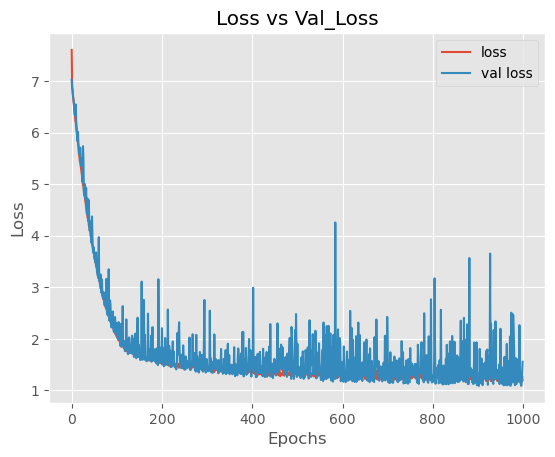

In [46]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

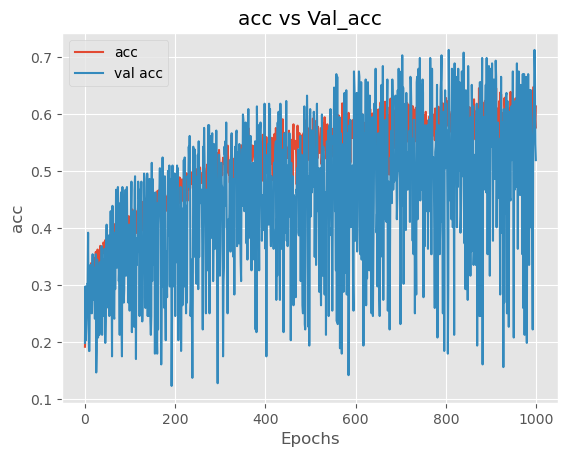

In [47]:
plt.plot(hist.history['acc'], label = 'acc')
plt.plot(hist.history['val_acc'], label='val acc')
plt.title("acc vs Val_acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [52]:
graph_count =[0,0,0,0,0,0,0]
for i in range(len(labels_test)):
    for j in range(7):
        if j == 0 and labels_test[i,j] == 1:
                graph_count[0]+=1
        if j == 1 and labels_test[i,j] == 1:
               graph_count[1]+=1
        if j == 2 and labels_test[i,j] == 1:
               graph_count[2]+=1
        if j == 3 and labels_test[i,j] == 1:
               graph_count[3]+=1
        if j == 4 and labels_test[i,j] == 1:
               graph_count[4]+=1
        if j == 5 and labels_test[i,j] == 1:
               graph_count[5]+=1
        if j == 6 and labels_test[i,j] == 1:
               graph_count[6]+=1
print(graph_count)    

[25, 29, 34, 30, 29, 30, 34]


In [53]:
graph_count2 = np.zeros(7)
for i in range(len(predictions)):
    if np.argmax(predictions[i]) == 0:
        graph_count2[0]+= 1
    if np.argmax(predictions[i]) == 1:
        graph_count2[1]+= 1
    if np.argmax(predictions[i]) == 2:
        graph_count2[2]+= 1
    if np.argmax(predictions[i]) == 3:
        graph_count2[3]+= 1
    if np.argmax(predictions[i]) == 4:
        graph_count2[4]+= 1
    if np.argmax(predictions[i]) == 5:
        graph_count2[5]+= 1
    if np.argmax(predictions[i]) == 6:
        graph_count2[6]+= 1
print(graph_count2)

[26. 26. 37. 28. 31. 34. 29.]


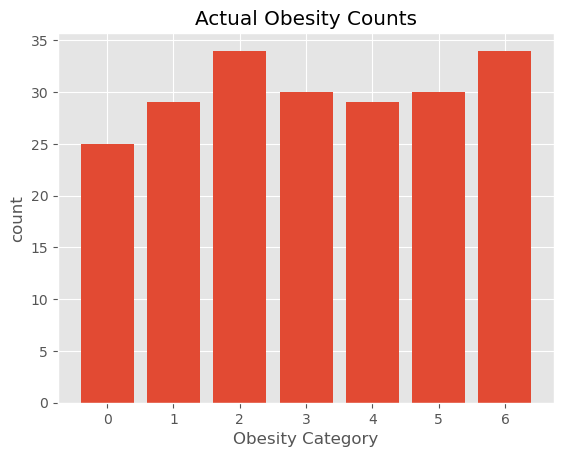

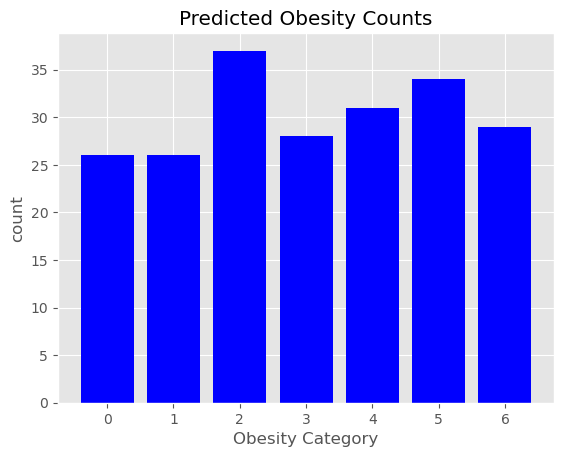

In [50]:
plt.bar(x=[0,1,2,3,4,5,6],height=graph_count)
plt.title("Actual Obesity Counts")
plt.xlabel("Obesity Category")
plt.ylabel("count")
plt.show()
plt.bar(x=[0,1,2,3,4,5,6], height=graph_count2,color="blue")
plt.title("Predicted Obesity Counts")
plt.xlabel("Obesity Category")
plt.ylabel("count")
plt.show()
print()

In [51]:
obesity_codes = {
"0:": "Insufficient Weight",
"1:": "Normal Weight",
"2:": "Obesity Level I",
"3:": "Obesity Level II",
"4:": "Obesity Level III",
"5:": "Overweight Level I",
"6:": "Overweight Level II"
}
for i in obesity_codes:
    print(i, obesity_codes[i])

0: Insufficient Weight
1: Normal Weight
2: Obesity Level I
3: Obesity Level II
4: Obesity Level III
5: Overweight Level I
6: Overweight Level II


In [106]:
print(input_test.loc[1536])
print(output_test.loc[1536])
print("")
print(predictions[0])

Age                                    25.154620
Height                                  1.758398
Weight                                112.089022
FCVC                                    1.108663
NCP                                     3.000000
CH2O                                    2.000000
FAF                                     1.230219
TUE                                     0.001716
Gender_Female                           0.000000
Gender_Male                             1.000000
family_history_with_overweight_no       0.000000
family_history_with_overweight_yes      1.000000
FAVC_no                                 0.000000
FAVC_yes                                1.000000
CAEC_Always                             0.000000
CAEC_Frequently                         0.000000
CAEC_Sometimes                          1.000000
CAEC_no                                 0.000000
SMOKE_no                                1.000000
SMOKE_yes                               0.000000
SCC_no              

In [88]:
print(output_test.sum(axis = 0))

NObeyesdad_Insufficient_Weight    25
NObeyesdad_Normal_Weight          29
NObeyesdad_Obesity_Type_I         34
NObeyesdad_Obesity_Type_II        30
NObeyesdad_Obesity_Type_III       29
NObeyesdad_Overweight_Level_I     30
NObeyesdad_Overweight_Level_II    34
dtype: int64
